# Importing Packages

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import pickle

# Code for Gmm Provided

In [9]:


def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
#     """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X.flatten())
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
             r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
        	# Write code here
            
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=[[r[i][0],r[i][1],r[i][2]]],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) 
        
                
                # For each cluster c, calculate the m_c and add it to the list m_c
            
            # write code here
            
            """calculate pi_c"""
            pi_c = []
            for m in m_c:
                pi_c.append(m/np.sum(m_c))
                
            self.pi = pi_c;
            
            # write code here
            
            """calculate mu_c"""
            # write code here
            
            mu_c= np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            self.mu = mu_c;


            """calculate var_c"""
            var_c = []
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-mu_c[c])).T,(self.X.reshape(len(self.X),1)-mu_c[c])))
            self.var = var_c;
            #write code here

            plt.show()

"""
To run the code - 
g = GMM1D(data,10,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()
"""



'\nTo run the code - \ng = GMM1D(data,10,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])\ng.run()\n'

# Providing parameters

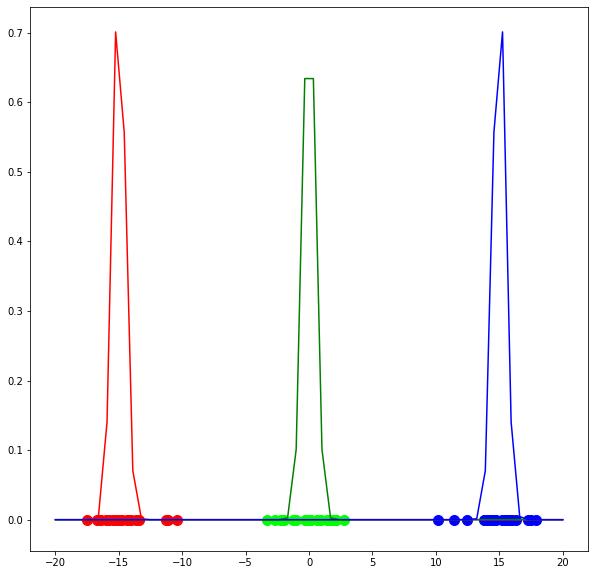

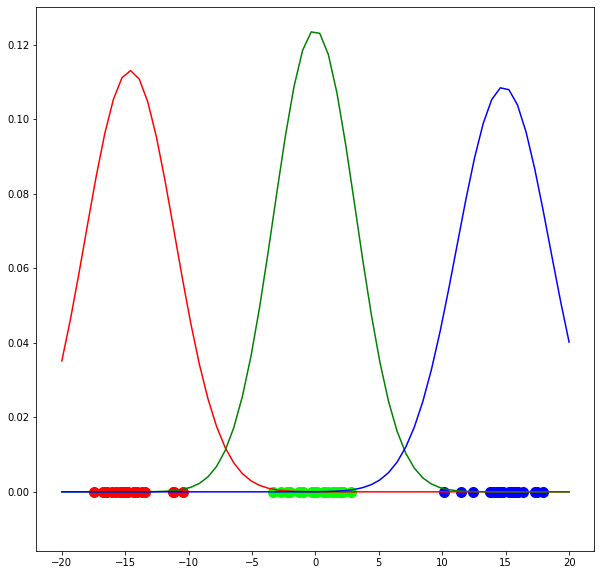

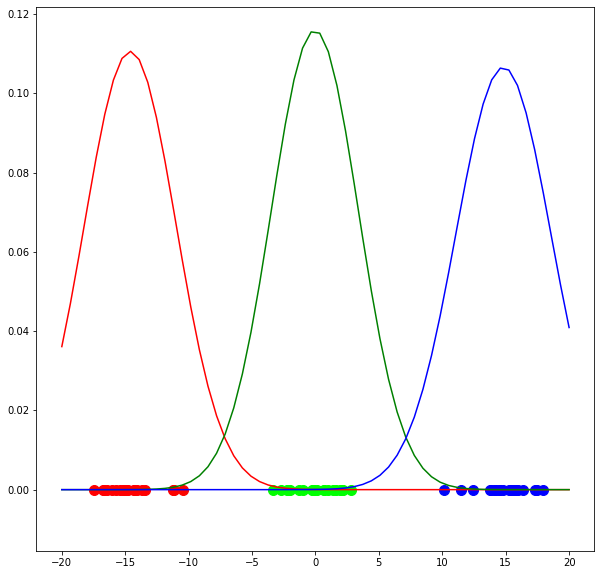

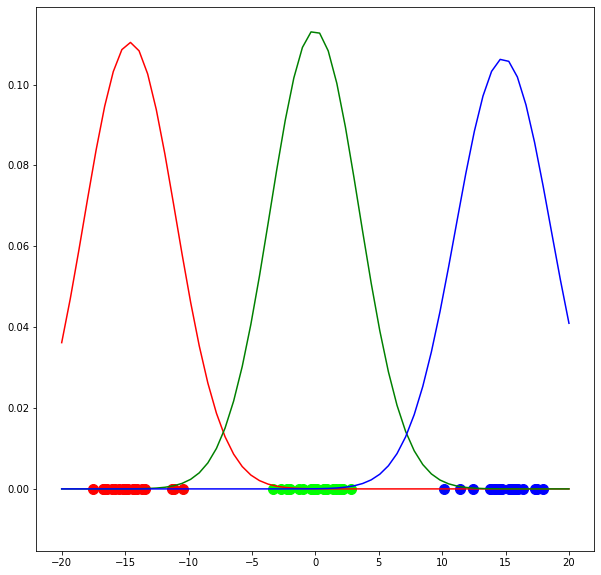

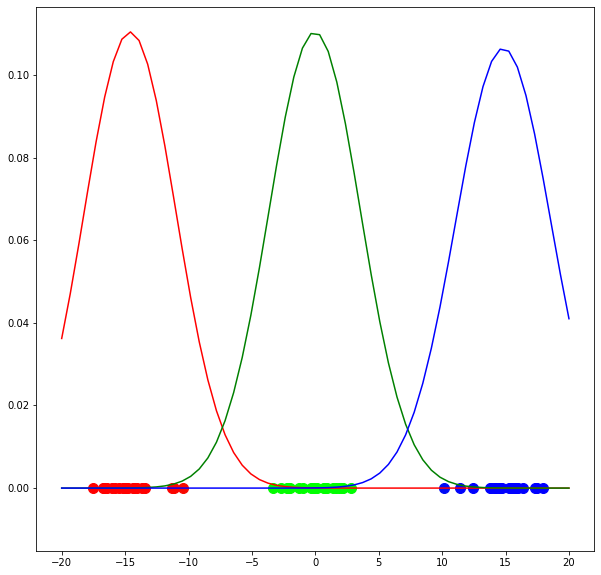

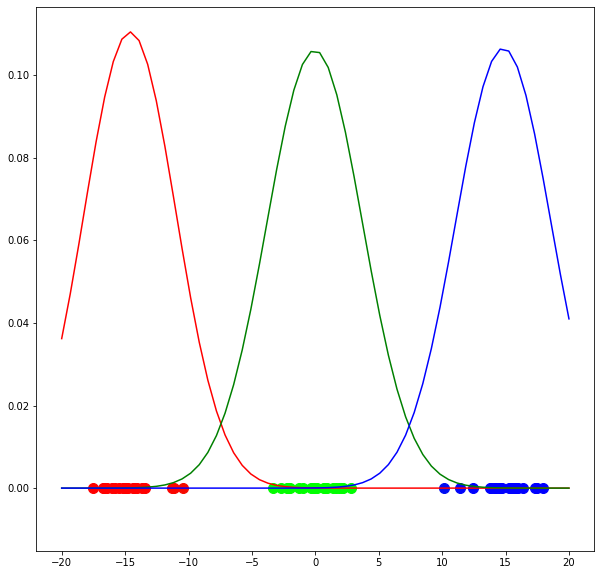

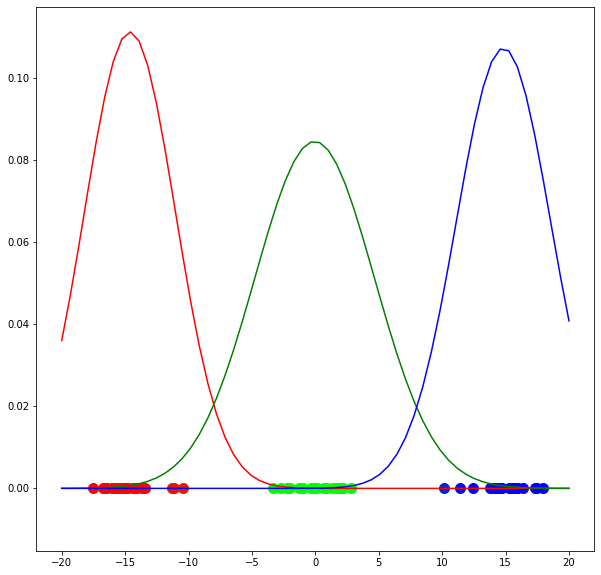

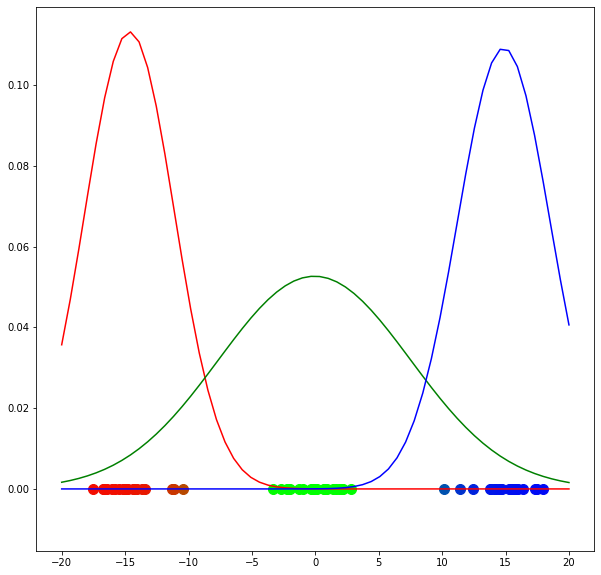

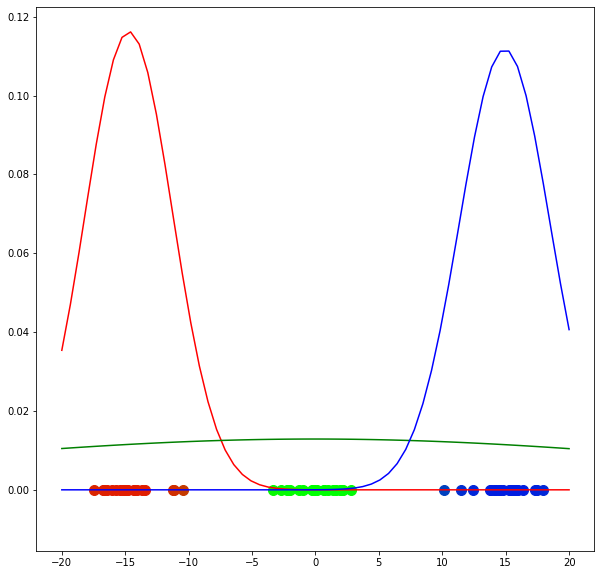

In [5]:

name1 = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset1.pkl'
#name = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset1-pkl'
data =  load(name1)
#data = data.flatten()
g = GMM1D(data,15,[-15,0,15],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()




# parameters for DataSet 2

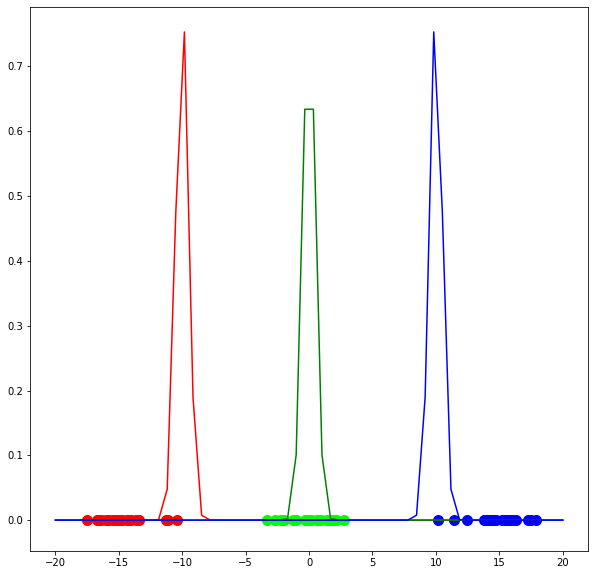

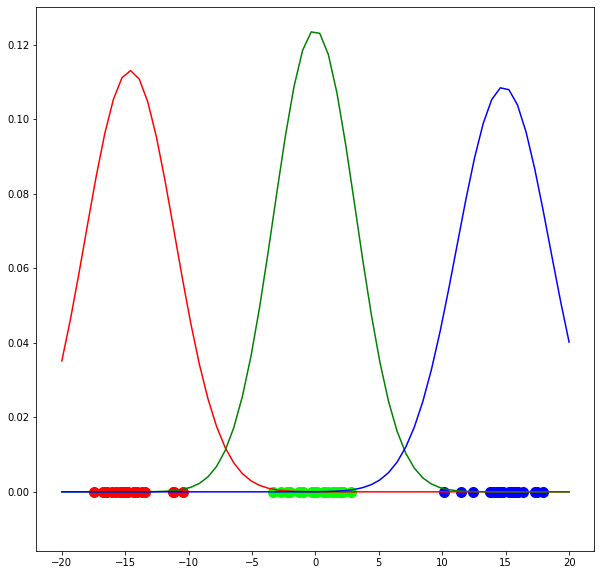

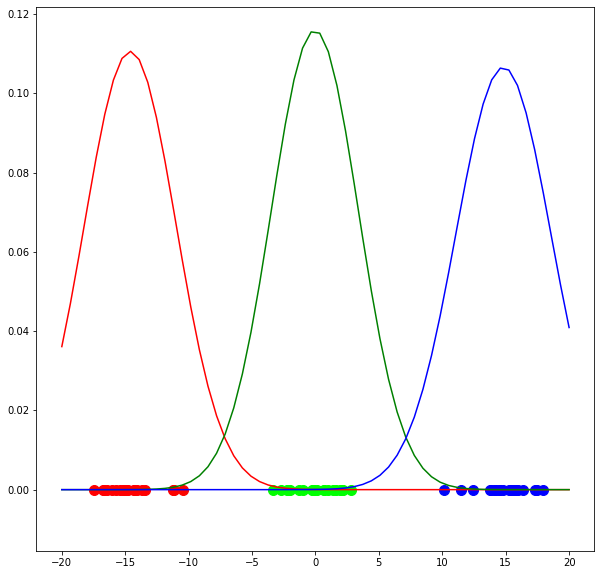

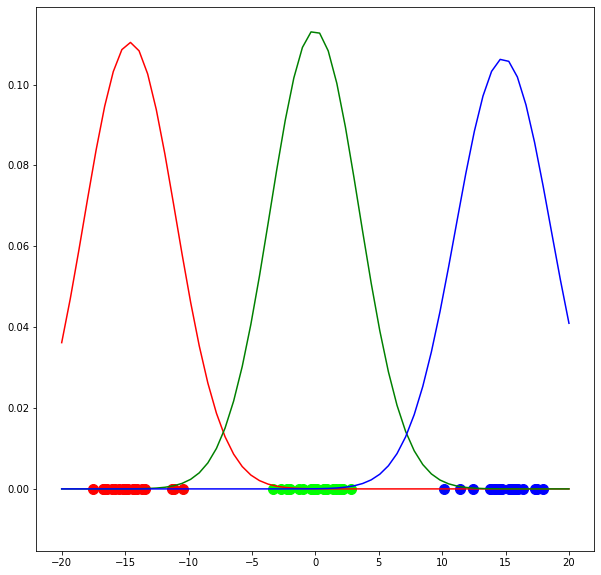

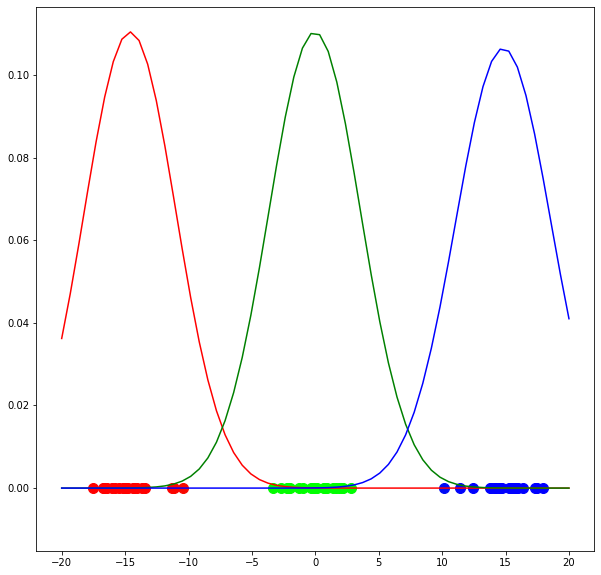

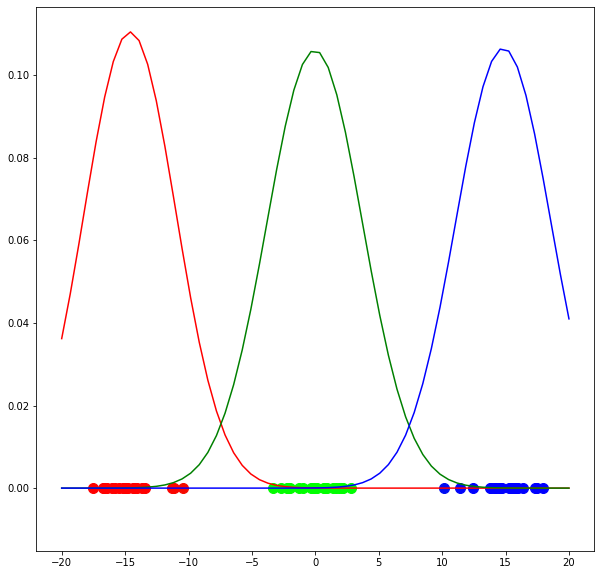

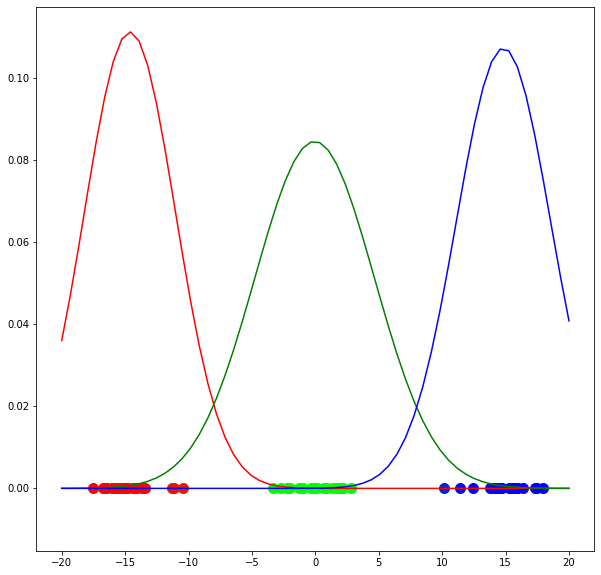

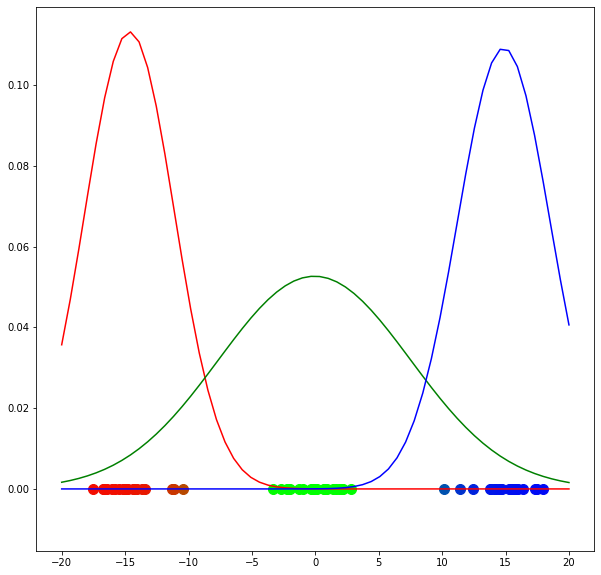

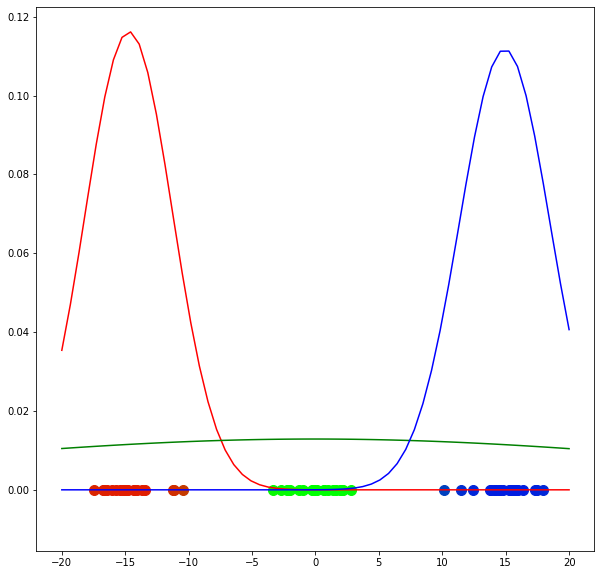

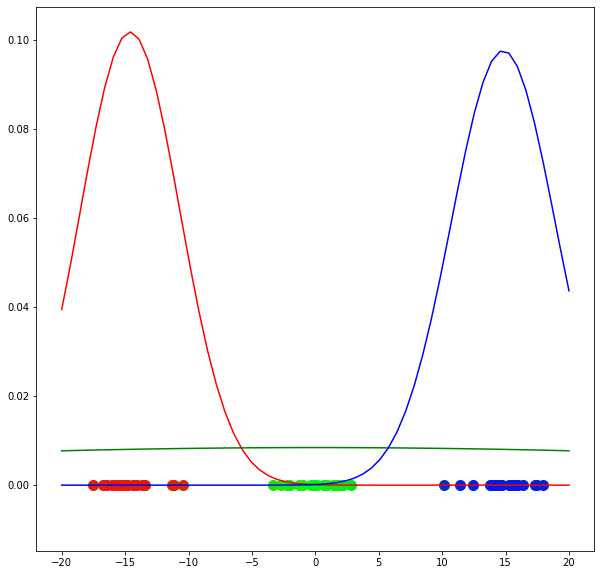

In [6]:


name2 = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset1.pkl'
#name = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset2-pkl'
data =  load(name2)
#data = data.flatten()
g = GMM1D(data,15,[-10,0,10],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()

# Parameters for Dataset 3

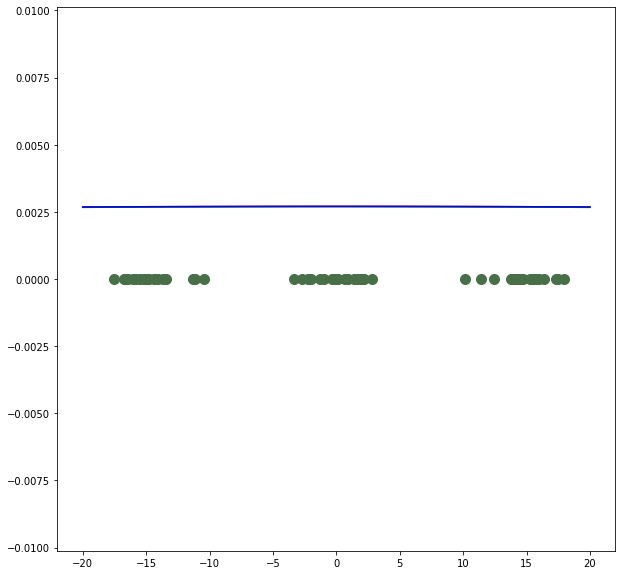

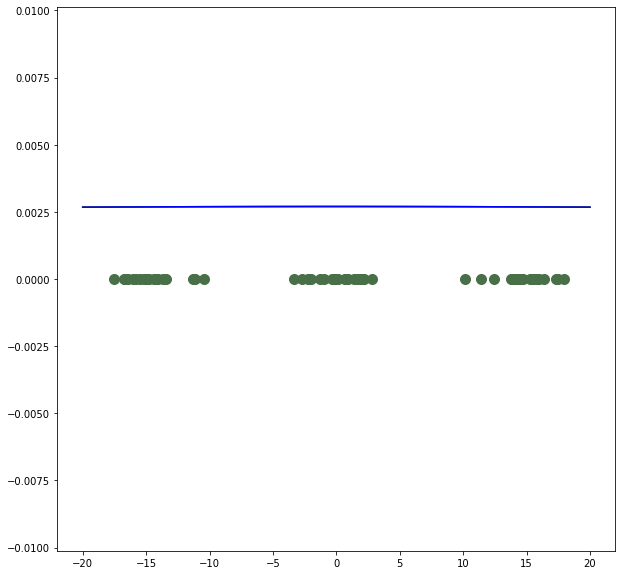

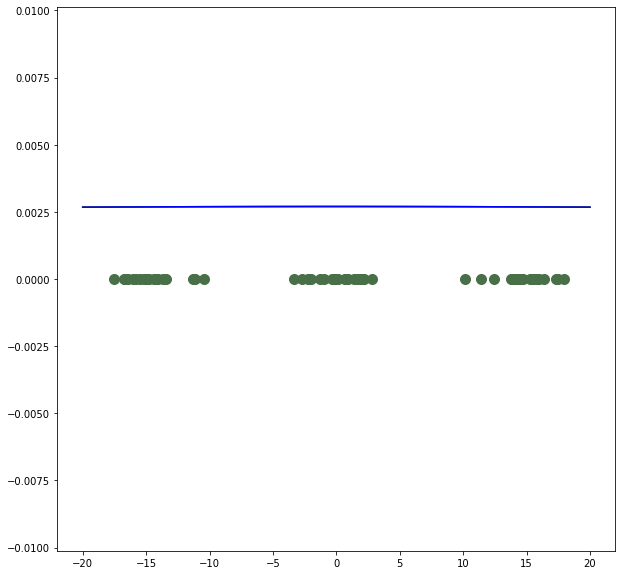

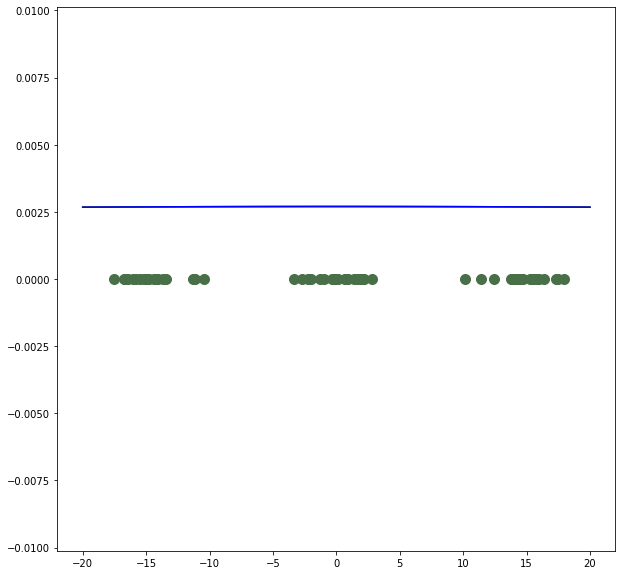

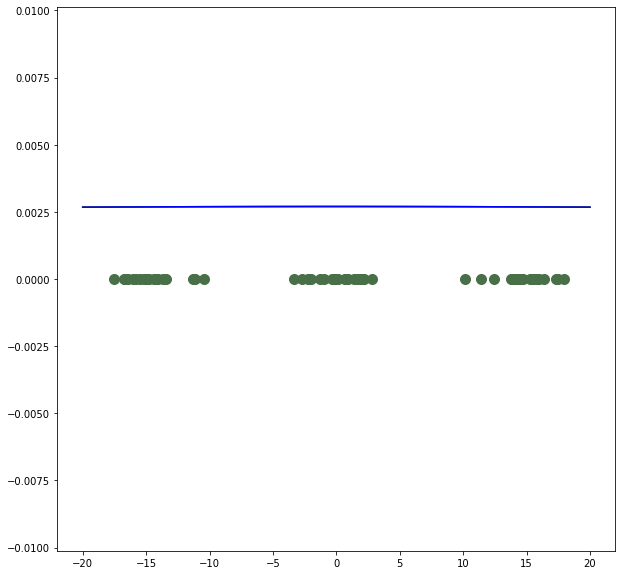

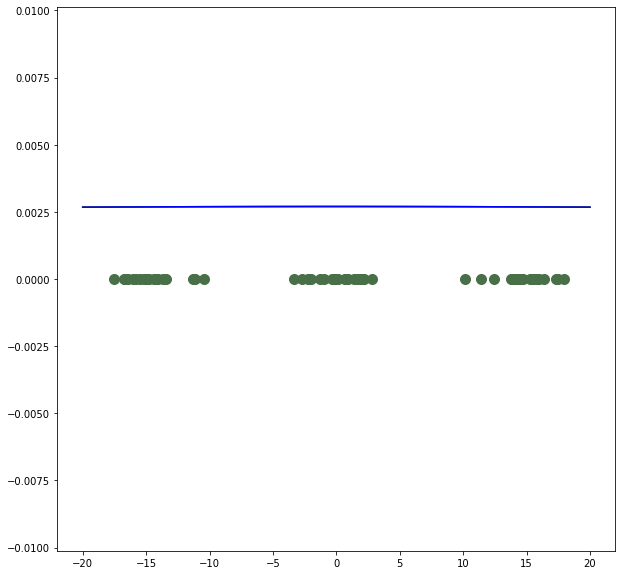

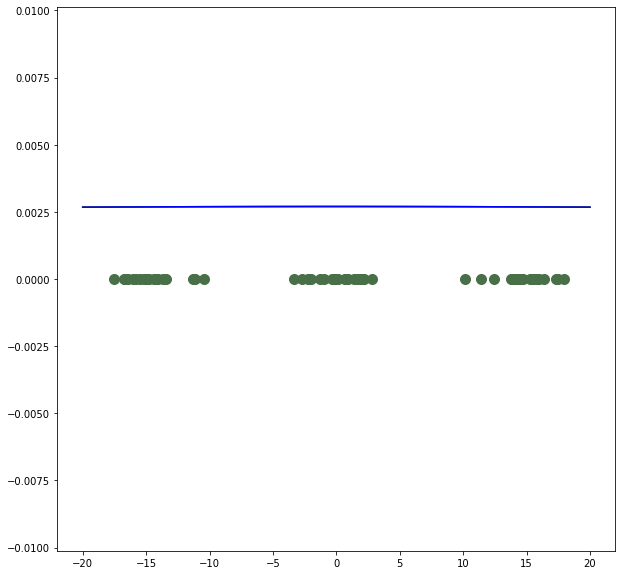

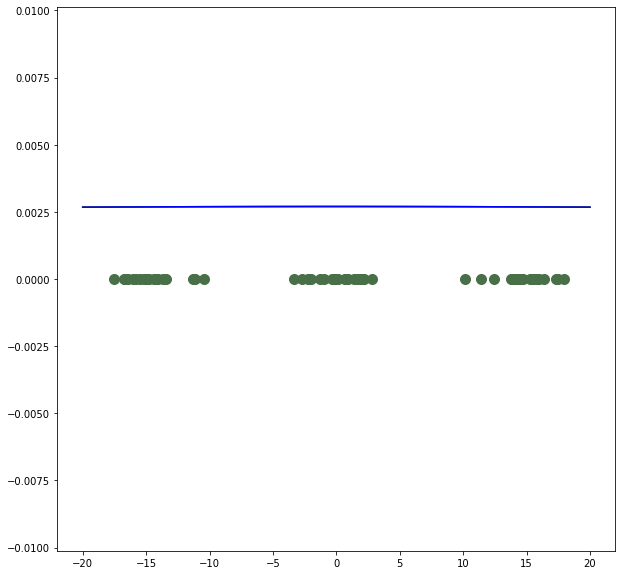

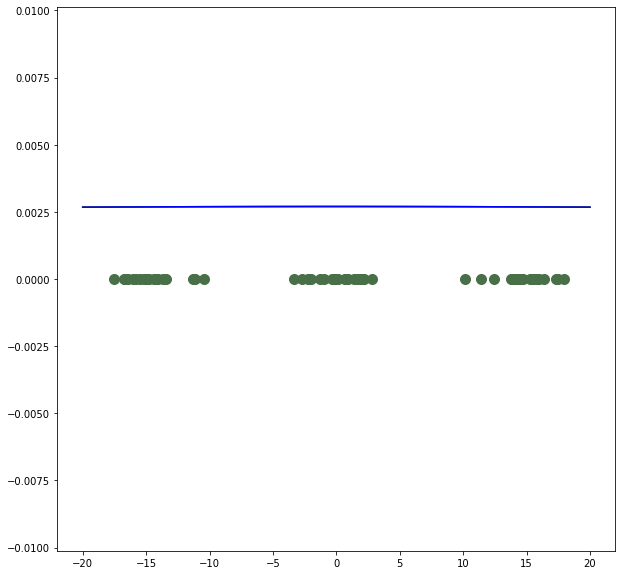

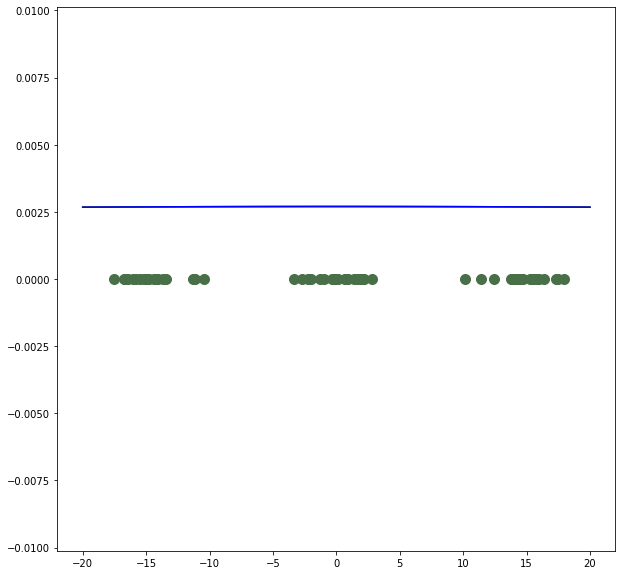

In [7]:


name3 = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset1.pkl'
#name = '/home/jeevesh/Desktop/smai/assignment2/OneDrive_1_15-02-2020/Datasets/Question-2/dataset1-pkl'
data =  load(name3)
#data = data.flatten()
g = GMM1D(data,15,[5,0,5],[1/3,1/3,1/3],[0.5,0.5,0.5])
g.run()

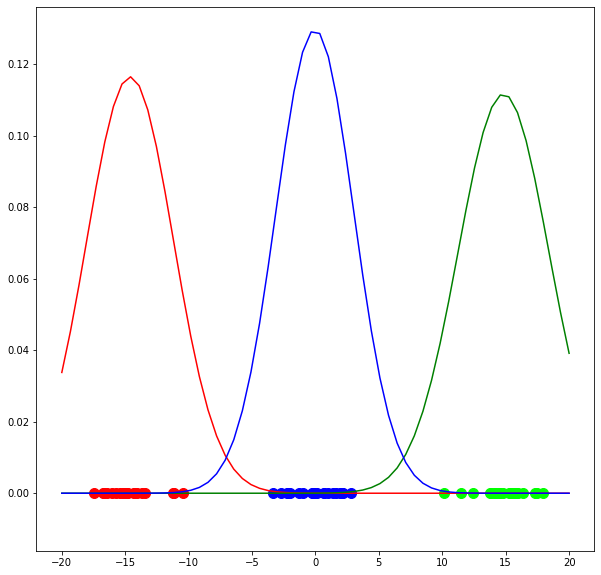

In [10]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(data)
prediction_gmm = gmm.predict(data)
probs = gmm.predict_proba(data)

centers = np.zeros((3,1))
for i in range(3):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(data)
    centers[i, :] = data[np.argmax(density)]

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(data)):
    ax0.scatter(data[i],0,c=[[probs[i][0],probs[i][1],probs[i][2]]],s=100)
"""Plot the gaussians"""
for g,c in zip([norm(loc=gmm.means_[0],scale=gmm.covariances_[0]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[1],scale=gmm.covariances_[1]).pdf(np.linspace(-20,20,num=60)),
                norm(loc=gmm.means_[2],scale=gmm.covariances_[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
    ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)